In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
import operator
import requests
import sys

In [2]:
path = 'zomato.csv'

In [3]:
df = pd.read_csv(path, encoding = 'ISO-8859-1')

In [4]:
test = df.copy()

#checking that no Retaurant ID is repeating
size = test.shape[0]
temp = test['Restaurant ID'].value_counts()
print(size, temp.shape[0])

9551 9551


In [5]:
#checking nan is not presnt in this
test.isna().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [6]:
#selecting India Country 
#country Code of India is 1
test = test[test['Country Code'] == 1]

#setting the index
test.reset_index(inplace = True, drop = True)

In [7]:
#checking no nan value is present for india country
test.isna().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

## Question 2.1

Write a short detail analysis of how the rating is affected by restaurant due following features: Plot a suitable graph to explain your inference.
1. Number of Votes given Restaurant
2. Restaurant serving more number of cuisines.
3. Average Cost of Restaurant
4. Restaurant serving some specific cuisines.

In [8]:
d_votes = {}      #dictionary maintain the number of votes and its rating
d_cuisines = {}   #dictionary maintain the number of cuisines and its rating
d_avg_cost = {}   #dictionary maintain cost and its rating
d_cuisine = {}    #dictionary mainatin the avg rating if a specific cuisine serving in restaurant

### 2.1.1 

In [9]:
## number of votes can be in repeatition. In that case we find the average of all the rating corresponding to that number of votes.
temp1 = test['Votes']
temp2 = test['Aggregate rating']
for i in range(len(temp1)):
    if temp1[i] in d_votes:
        li = d_votes[temp1[i]]                #list to store the sum of rating and the number of restaurants to get the avg rating
        li[0] += temp2[i]
        li[1] += 1
    else:
        li = [temp2[i], 1]
        d_votes[temp1[i]] = li


In [10]:
#Finding the average rating
for key, val in d_votes.items():
    avg_rating = val[0]/val[1];
    d_votes[key] = avg_rating    

In [11]:
#top 15 restaurants on the basis of votes and their rating in decreaing order of number of votes
i = 0
votes = []
rating = []
for key in sorted(d_votes.keys(), reverse = True):
    votes.append(key)
    rating.append(d_votes[key])
    print(i+1,key, d_votes[key])
    i += 1
    if i == 15:
        break


1 10934 4.8
2 9667 4.7
3 7931 4.3
4 7574 4.3
5 6907 4.6
6 5966 4.9
7 5705 4.5
8 5434 4.9
9 5385 4.1
10 5288 4.2
11 5172 4.3
12 5145 4.0
13 4986 4.5
14 4914 3.7
15 4689 4.0


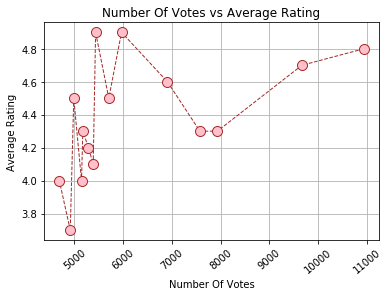

In [12]:
#plot the plot line
plt.plot(votes, rating, color='brown', linestyle='dashed', linewidth = 1, marker='o', markerfacecolor='pink', markersize=10)
plt.xlabel("Number Of Votes")
plt.xticks(rotation=40)
plt.ylabel("Average Rating")
plt.title("Number Of Votes vs Average Rating")
plt.grid()
plt.show()

### 2.1.2 

In [13]:
## number of cuisines can be in repeatition. In that case we find the average of all the rating corresponding to that number of cuisines.
temp1 = []    #maintain the count of cuisines corresponding each row
for i in range(len(test)):
    Cuisines_list = test['Cuisines'][i].split(',')
    temp1.append(len(Cuisines_list))

In [14]:
temp2 = test['Aggregate rating']
for i in range(len(temp1)):
    if temp1[i] in d_cuisines:
        li = d_cuisines[temp1[i]]                #list to store the sum of rating and the number of restaurants to get the avg rating
        li[0] += temp2[i]
        li[1] += 1
    else:
        li = [temp2[i], 1]
        d_cuisines[temp1[i]] = li


In [15]:
#Finding the average rating
for key, val in d_cuisines.items():
    avg_rating = val[0]/val[1];
    d_cuisines[key] = avg_rating    

In [16]:
#top restaurants on the basis of no of cuisines and their rating in decreaing order of number of votes
i = 0
cuisine = []
rating = []
for key in sorted(d_cuisines.keys(), reverse = True):
    cuisine.append(key)
    rating.append(d_cuisines[key])
    print(i+1,key, d_cuisines[key])
    i += 1

1 8 3.266666666666667
2 7 3.646153846153846
3 6 3.651428571428572
4 5 3.4812903225806444
5 4 3.379166666666665
6 3 2.8905388471177957
7 2 2.563422391857511
8 1 2.0550855666774277


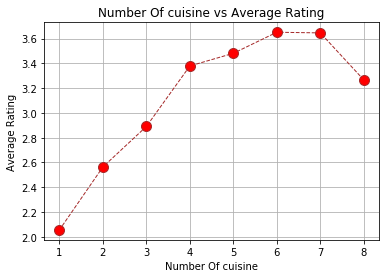

In [17]:
#plot the plot line
plt.plot(cuisine, rating, color='brown', linestyle='dashed', linewidth = 1, marker='o', markerfacecolor='red', markersize=10)
plt.xlabel("Number Of cuisine")
plt.ylabel("Average Rating")
plt.title("Number Of cuisine vs Average Rating")
plt.grid()
plt.show()

### 2.1.3 

In [18]:
## average cost can be in repeatition. In that case we find the average of all the rating corresponding to that number of votes.
temp1 = test['Average Cost for two']
temp2 = test['Aggregate rating']
for i in range(len(temp1)):
    if temp1[i] in d_avg_cost:
        li = d_avg_cost[temp1[i]]                #list to store the sum of rating and the number of restaurants to get the avg rating
        li[0] += temp2[i]
        li[1] += 1
    else:
        li = [temp2[i], 1]
        d_avg_cost[temp1[i]] = li


In [19]:
#Finding the average rating
for key, val in d_avg_cost.items():
    avg_rating = val[0]/val[1];
    d_avg_cost[key] = avg_rating    

In [20]:
#top restaurants on the basis of no of cuisines and their rating in decreaing order of number of votes
i = 0
cost = []
rating = []
for key in sorted(d_avg_cost.keys(), reverse = True):
    cost.append(key)
    rating.append(d_avg_cost[key])
    print(i+1,key, d_avg_cost[key])
    i += 1
    if i == 15:
        break

1 8000 4.0
2 7000 4.1
3 6500 4.4
4 6000 3.75
5 5500 3.95
6 5100 3.7
7 5000 3.775
8 4800 4.2
9 4700 3.7
10 4500 3.816666666666667
11 4400 3.6
12 4300 3.9
13 4200 3.6
14 4100 3.5
15 4000 3.9599999999999995


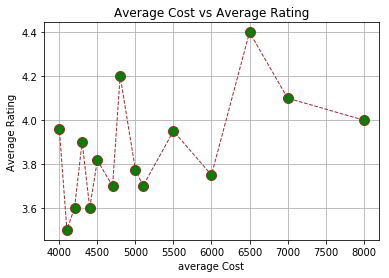

In [21]:
#plot the plot line
plt.plot(cost, rating, color='brown', linestyle='dashed', linewidth = 1, marker='o', markerfacecolor='green', markersize=10)
plt.xlabel("average Cost")
plt.ylabel("Average Rating")
plt.title("Average Cost vs Average Rating")
plt.grid()
plt.show()

### 2.1.4 

In [22]:
## cuisine can be in repeatition. In that case we find the average of all the rating corresponding to that number of votes.
temp1 = test['Cuisines']
temp2 = test['Aggregate rating']
for i in range(len(temp1)):
    Cuisines_list = temp1[i].split(',')
    for ele in Cuisines_list:
        temp = ele.strip()
        if temp in d_cuisine:
            li = d_cuisine[temp]                #list to store the sum of rating and the number of restaurants to get the avg rating
            li[0] += temp2[i]
            li[1] += 1
        else:
            li = [temp2[i], 1]
            d_cuisine[temp] = li


In [23]:
#Finding the average rating
for key, val in d_cuisine.items():
    avg_rating = val[0]/val[1];
    d_cuisine[key] = avg_rating    

In [24]:
#top restaurants on the basis of cuisines and their rating in decreaing order of number of votes
cuisine = []
rating = []
i = 1
for key, value in sorted(d_cuisine.items(), key=lambda item: item[1], reverse = True):
    cuisine.append(key)
    rating.append(value)
    print(i,"%s: %s" % (key, value))
    if i == 15:
        break;
    i += 1

1 Persian: 4.6
2 German: 4.35
3 Modern Indian: 4.28125
4 Charcoal Grill: 4.175000000000001
5 Parsi: 4.1
6 Iranian: 4.066666666666666
7 Steak: 4.05
8 Burmese: 4.05
9 Spanish: 4.028571428571428
10 Indonesian: 4.0
11 Sri Lankan: 4.0
12 Goan: 3.952631578947368
13 Mediterranean: 3.9311111111111123
14 Greek: 3.9200000000000004
15 Belgian: 3.9


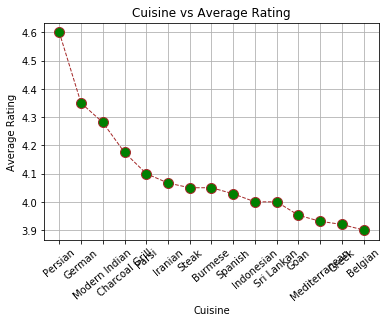

In [25]:
#plot the plot line
plt.plot(cuisine, rating, color='brown', linestyle='dashed', linewidth = 1, marker='o', markerfacecolor='green', markersize=10)
plt.xlabel("Cuisine")
plt.ylabel("Average Rating")
plt.xticks(rotation = 40)
plt.title("Cuisine vs Average Rating")
plt.grid()
plt.show()

## Question 2.2 

Find the weighted restaurant rating of each locality and find out the top 10 localities with more weighted restaurant rating?

Weighted Restaurant Rating=Σ (number of votes * rating) / Σ (number of votes) .

In [26]:
#making weighted Restaurant rating
weighted_rating = {}        #key is locality and value is list which holds the Σ (number of votes * rating) and Σ number of vote
for i in range(len(test)):
    locality = test['Locality'][i]
    if locality in weighted_rating:
        li = weighted_rating[locality]
        li[0] += test['Votes'][i]*test['Aggregate rating'][i]
        li[1] += test['Votes'][i]
        weighted_rating[locality] = li
    else:
        li = [test['Votes'][i]*test['Aggregate rating'][i],test['Votes'][i]]
        weighted_rating[locality] = li
        

In [27]:
#finding weighted rating
for key, val in weighted_rating.items():
    if(val[1] != 0):                               #division cant be with 0
        weighted_rate = val[0]/val[1]
    else:
        weighted_rate = 0
    weighted_rating[key] = weighted_rate

In [28]:
#top 10 locality
i = 1
for key, value in sorted(weighted_rating.items(), key=lambda item: item[1], reverse = True):
    print(i,"%s: %s" % (key, value))
    if i == 10:
        break;
    i += 1

1 Hotel Clarks Amer, Malviya Nagar: 4.9
2 Aminabad: 4.9
3 Friends Colony: 4.886916367367881
4 Powai: 4.841868613138686
5 Kirlampudi Layout: 4.820161290322581
6 Express Avenue Mall,  Royapettah: 4.8
7 Deccan Gymkhana: 4.8
8 Banjara Hills: 4.7187617260787995
9 Sector 5, Salt Lake: 4.707022552098202
10 Riverside Mall, Gomti Nagar: 4.7
